# **Data in ML/DL**

- "**Data**" in ML (Machine Learning) or DL (Deep Learning) can be **almost any information** such as
    - **table of values**: 2-dimensional, consisting of rows and columns.
    - **images**: 3-dimensional arrays (tensors); Height x Width x Channels = `256x256x3`.
    - **videos**: Sequences of images (frames), adding a time dimension to the 3-dimensional structure of images.
      - Time x Height x Width x Channels = `300x256x256x3`
        - 30 frames of 256x256 color image per second, and 10 seconds long.
    - **audio** files: 1-dimensional arrays for **mono audio** (time) or 2-dimensional arrays for **stereo audio** (Time x Channels).
      - `441000x2` = a stereo audio file with a sampling rate of 44.1 kHz (44100 samples per second) and 10 seconds long.
    - **text**: Often represented as sequences of tokens (words, characters).
      - Number of Tokens (for a single sentence) or Number of Documents x Number of Tokens (for a corpus)
      - A sentence can be represented as a 1-dimensional array of word indices. A collection of sentences can be represented as a 2-dimensional array, with each row representing a sentence and each column representing a word index.
    - **protein structures**: Often involving 3D coordinates.
      - A protein with 1000 atoms can be represented as a 1000x3 array where each row represents the x, y, z coordinates of an atom.

In [ ]:
import numpy as np

# Example of a 256x256 RGB image
image = np.random.rand(256, 256, 3)
image.shape

(256, 256, 3)

In [ ]:
# Example of a 10-second video with 30 FPS and 256x256 RGB frames
video = np.random.rand(300, 256, 256, 3)
video.shape

(300, 256, 256, 3)

In [ ]:
# Example of a 10-second stereo audio file at 44.1 kHz
audio = np.random.rand(441000, 2)
audio.shape

(441000, 2)

In [ ]:
# Example of a protein structure with 1000 atoms
protein_structure = np.random.rand(1000, 3)
protein_structure.shape

(1000, 3)

In [ ]:
# Example of a document represented as sequences of word indices
document = [1, 5, 23, 56, 78]  # A single sentence
corpus = [[1, 5, 23], [56, 78, 92], [3, 14, 15, 92]]  # A collection of sentences

- The goal of ML/DL is to:
    - Turn the data into a **representative set of numerical values** and
    - Then build a model to **learn the numerical representation** of the data as best as possible.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230413105611/Maachine-Learning.webp" alt="Scope of data science" width="500">

# **PyTorch**

- PyTorch was released in January 2017 by Facebook AI Research (FAIR) lab.
- It is an open-source project and has contributions from many developers worldwide.
- **NVIDIA** has been known for its design and manufacture of graphics processing units (GPUs).
- It has been a significant contributor to the PyTorch ecosystem.
    - Especially in terms of providing support for CUDA (Compute Unified Device Architecture).
    - CUDA is a parallel computing platform developed by NVIDIA for general computing on GPUs.
    - This ensures that PyTorch can leverage NVIDIA GPUs for accelerated computing.

In [ ]:
import torch

torch.__version__

'2.3.0+cu121'

- The suffix `cu121` in  `2.3.0+cu121` indicates the version of CUDA that the PyTorch build is compatible with.
- This means that this version of PyTorch (2.3.0) is compatible with NVIDIA GPUs that support CUDA 12.1.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import torch
import numpy as np
import random

def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False

set_seed()


# **1. [Tensors](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)**

* Tensor is the primary data structure in PyTorch.
* Everything in pytorch is based on **tensor** operations.
* A tensor can have **different dimensions**.
* So it can be scalar (**0D**), vector (**1D**), matrix (**2D**), or **3D** and higher.

\\

<img src="https://github.com/awolseid/tutorial_figures/blob/main/TensorNumbers.jpg?raw=true" alt="Tensors" width="400">

\\

<img src="https://github.com/awolseid/tutorial_figures/blob/main/TensorsFig.png?raw=true" alt="Tensors" width="600">







## **1.01. Creating Tensors: `torch.tensor()` and `torch.Tensor()`**

- The PyTorch documentation indicates that `torch.Tensor` is an alias for `torch.FloatTensor`.
    - It happens to be very similar in name to `torch.tensor`, but, it has a very different behaviour.
    - On the other hand, `torch.tensor` infers the` dtype` automatically, while `torch.Tensor` returns a `torch.FloatTensor`.
- For example, `print(torch.Tensor([1, 3]))` gives the output `tensor([1., 3.])` (data type = `torch.float32`) whereas `print(torch.tensor([1, 3]))` gives the output `tensor([1, 3])` (data type = `torch.int64`).


In [ ]:
x1 = torch.tensor([1])
x1, x1.ndim, x1.dtype

(tensor([1]), 1, torch.int64)

In [ ]:
x2 = torch.tensor([1, 2])
x2, x2.ndim, x2.dtype

(tensor([1, 2]), 1, torch.int64)

In [ ]:
x3 = torch.tensor([[1, 2], [3, 4]])
x3, x3.ndim, x3.dtype

(tensor([[1, 2],
         [3, 4]]),
 2,
 torch.int64)

In [ ]:
x4 = torch.tensor([[[1, 2], [3, 2]], [[1, 7], [5, 4]]])
x4, x4.ndim, x4.dtype

(tensor([[[1, 2],
          [3, 2]],
 
         [[1, 7],
          [5, 4]]]),
 3,
 torch.int64)

## **1.02. Constant fills**

In [ ]:
x = torch.zeros(2, 3)
x, x.ndim, x.dtype

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 2,
 torch.float32)

In [ ]:
x = torch.ones(2, 3)
x, x.ndim, x.dtype

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 2,
 torch.float32)

## **1.03. Tensor data types**

In [ ]:
x = torch.tensor([2.5, 0.1])
x, x.ndim, x.dtype

(tensor([2.5000, 0.1000]), 1, torch.float32)

In [ ]:
x = torch.ones(2, 3)
x, x.ndim, x.dtype

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 2,
 torch.float32)

In [ ]:
x = torch.ones(2, 3, dtype=torch.int)
x, x.ndim, x.dtype

(tensor([[1, 1, 1],
         [1, 1, 1]], dtype=torch.int32),
 2,
 torch.int32)

In [ ]:
x = torch.ones(2, 3, dtype=torch.double)
x, x.ndim, x.dtype

(tensor([[1., 1., 1.],
         [1., 1., 1.]], dtype=torch.float64),
 2,
 torch.float64)

In [ ]:
x = torch.ones(2, 3, dtype=torch.float16)
x, x.ndim, x.dtype

(tensor([[1., 1., 1.],
         [1., 1., 1.]], dtype=torch.float16),
 2,
 torch.float16)

In [ ]:
x = torch.ones(2, 3, dtype=torch.float16)
x, x.ndim, x.dtype

(tensor([[1., 1., 1.],
         [1., 1., 1.]], dtype=torch.float16),
 2,
 torch.float16)

## **1.04. Tensor operations**

##### **Pointwise** Ops

  - [`torch.abs()`](https://pytorch.org/docs/stable/generated/torch.abs.html#torch.abs): returns the abosolute value of each element of a tensor.
  - [`torch.ceil()`](https://pytorch.org/docs/stable/generated/torch.ceil.html#torch.ceil): Returns the ceil of the elements of a tensor, the smallest integer greater than or equal to each element.
  - [`torch.exp()`](https://pytorch.org/docs/stable/generated/torch.exp.html#torch.exp): Returns the exponential of the elements of a tensor.

In [ ]:
a = torch.tensor([-1.9, -2.3, 3])
print(torch.abs(a))
print(torch.ceil(a))
print(torch.exp(a))

tensor([1.9000, 2.3000, 3.0000])
tensor([-1., -2.,  3.])
tensor([ 0.1496,  0.1003, 20.0855])


##### **Reduction** Ops


  - [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html#torch.argmax): returns the indices of the max value of all the elements of a tensor.
  - [`torch.mean()`](https://pytorch.org/docs/stable/generated/torch.mean.html#torch.mean): returns the mean value of all the elements of a tensor.
  - [`torch.unique()`](https://pytorch.org/docs/stable/generated/torch.exp.html#torch.exp): returns the unique elements of a tensor.


In [ ]:
a = torch.tensor([1, 2.3, 0.9])
print(torch.argmax(a))
print(torch.mean(a))

a = torch.tensor ([-1, 2, -1, 0, 0.1, 0.1, 1, 0.1])
print(torch.unique(a))

tensor(1)
tensor(1.4000)
tensor([-1.0000,  0.0000,  0.1000,  1.0000,  2.0000])


##### **Elementwise** Ops

- `+` : [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html?highlight=add#torch.add)
- `-` : [`torch.sub()`](https://pytorch.org/docs/stable/generated/torch.sub.html)
- `*` : [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html)
- `/` : [`torch.div()`](https://pytorch.org/docs/stable/generated/torch.div.html)

In [ ]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
x, y

(tensor([[0.9147, 0.2036],
         [0.2018, 0.2018]]),
 tensor([[0.9497, 0.6666],
         [0.9811, 0.0874]]))

In [ ]:
z = x + y
print(z)
z=torch.add(x, y)
print(z)

tensor([[1.8644, 0.8703],
        [1.1829, 0.2891]])
tensor([[1.8644, 0.8703],
        [1.1829, 0.2891]])


- **Inplace Operations**

In [ ]:
y.add_(x)
print(y)

tensor([[1.8644, 0.8703],
        [1.1829, 0.2891]])


In [ ]:
z = x - y
print(z)
z = torch.sub(x, y)
print(z)

tensor([[-0.9497, -0.6666],
        [-0.9811, -0.0874]])
tensor([[-0.9497, -0.6666],
        [-0.9811, -0.0874]])


In [ ]:
z = x * y
print(z)
z = torch.mul(x,y)
print(z)

tensor([[1.7054, 0.1772],
        [0.2387, 0.0583]])
tensor([[1.7054, 0.1772],
        [0.2387, 0.0583]])


In [ ]:
z = x / y
print(z)
z = torch.div(x,y)
print(z)

tensor([[0.4906, 0.2340],
        [0.1706, 0.6979]])
tensor([[0.4906, 0.2340],
        [0.1706, 0.6979]])


##### **Comparison** Ops

  - [`torch.eq()`](https://pytorch.org/docs/stable/generated/torch.eq.html#torch.eq): computes element-wise equality between two tensors.
  - [`torch.equal()`](https://pytorch.org/docs/stable/generated/torch.equal.html#torch.equal): returns 'True' if two tensors have the same size and elements.
  - [`torch.sort()`](https://pytorch.org/docs/stable/generated/torch.sort.html#torch.sort): sorts the elements of the tensor along a given dimension in an increasing order of values.

In [ ]:
a = torch.tensor([[1, 5], [5, 4]])
b = torch.tensor([[1, 2], [3, 3]])

print(torch.eq(a, b))
print(torch.equal(a, b))

print(torch.sort(a, 0)) # sort by row
print(torch.sort(a, 1)) # sort by column

tensor([[ True, False],
        [False, False]])
False
torch.return_types.sort(
values=tensor([[1, 4],
        [5, 5]]),
indices=tensor([[0, 1],
        [1, 0]]))
torch.return_types.sort(
values=tensor([[1, 5],
        [4, 5]]),
indices=tensor([[0, 1],
        [1, 0]]))


## **1.05. Slicing**


In [ ]:
set_seed()
x = torch.rand(5,3)
print(x)
print(x[:, 0])
print(x[1, :])
print(x[1,1])

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411]])
tensor([0.8823, 0.9593, 0.2566, 0.1332, 0.8694])
tensor([0.9593, 0.3904, 0.6009])
tensor(0.3904)


- Getting a value if there is only 1 element in the tensor

In [ ]:
print(x[1, 1].item())

0.3904482126235962


**index_select**


``` python
[[1 2]
 [3 4]
```
I want to get `[1 3]` from a 2D tensor!

- [`torch.index_select()`](https://pytorch.org/docs/stable/generated/torch.index_select.html?highlight=index#torch.index_select)


In [ ]:
import torch

A = torch.Tensor([[1, 2],
                  [3, 4]])
indices = torch.tensor([0])
output1 = torch.index_select(A, 1, indices).reshape([1, -1])
output2 = torch.index_select(A, 1, indices).view(-1,)

output1, output2

(tensor([[1., 3.]]), tensor([1., 3.]))

Do it in a similar way to Python List Indexing!

In [ ]:
output = A[:, 0]
output

tensor([1., 3.])

**Import diagonal elements from 2D sensor - 2D daughter**

``` python
[[1 2]
 [3 4]]
```
I want to make a 1D tensor by taking **only diagonal elements** from a 2D tensor

- [`torch.gather()`](https://pytorch.org/docs/stable/generated/torch.gather.html#torch.gather)


In [ ]:
import torch
matrix = torch.arange(0,100).reshape(10,10)
print(matrix)
indices = torch.arange(0,10)
print(indices)
indices = indices.unsqueeze(axis=1)
print(indices)

output = torch.gather(matrix, 1, indices).reshape([1, -1])
print(output)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])
tensor([[ 0, 11, 22, 33, 44, 55, 66, 77, 88, 99]])


In [ ]:
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
import torch

A = torch.Tensor([[1, 2],
                  [3, 4]])

indices = torch.tensor([0, 1]).unsqueeze(axis=1)
output = torch.gather(A, 1, indices).reshape([1, -1])
output

tensor([[1., 4.]])

-Consider

``` python
[[[1 2]
  [3 4]]
 [[5 6]
  [7 8]
```
I want to make a two-dimensional tensor called

```
  [[1 4]
   [5 8]]
```


   
   by taking only diagonal elements from the three-dimensional tensor
- [`torch.gather()`](https://pytorch.org/docs/stable/generated/torch.gather.html#torch.gather)


In [ ]:
import torch

A = torch.Tensor([[[1, 2],
                   [3, 4]],
                  [[5, 6],
                   [7, 8]]])

indices = torch.tensor([
                        [[0],[1]],
                        [[0],[1]]
                        ])
output = torch.gather(A, 2, indices).reshape([2, 2])  #.view(2, 2)
output

tensor([[1., 4.],
        [5., 8.]])

So far, we've taken diagonal elements from inputs of a given size.
Can a 3D tensor of any size take diagonal elements and make a 2D tensor as well?

- to make the desired size of the [`torch.Tensor.expand()`](https://pytorch.org/docs/stable/generated/torch.Tensor.expand.html?highlight=expand) is available!

In [ ]:
import torch

def get_diag_element_3D(A):
  C, H, W = A.size()
  diag_size = min(H,W)

  gather_index = torch.arange(diag_size).view(diag_size, -1).expand(C, diag_size, 1)
  output = torch.gather(A, 2, gather_index)
  output = output.view(C, diag_size)
  return output

In [ ]:
C = 1
H = 2
W = 3

A = torch.tensor([i for i in range(1, C*H*W + 1)])
A = A.view(C, H, W)

get_diag_element_3D(A)

tensor([[1, 5]])

In [ ]:
A = torch.tensor([[[1]]])

torch.all(get_diag_element_3D(A) == torch.Tensor([[1]]))

tensor(True)

In [ ]:
A = torch.Tensor([[[1, 2],
                   [3, 4]],
                  [[5, 6],
                   [7, 8]]])

torch.all(get_diag_element_3D(A) == torch.Tensor([[1, 4], [5, 8]]))

tensor(True)

In [ ]:
A = torch.Tensor([[[1, 2, 3],
                   [4, 5, 6]]])

torch.all(get_diag_element_3D(A) == torch.Tensor([[1, 5]]))

tensor(True)

In [ ]:
A = torch.tensor([[[ 1,  2,  3,  4,  5],
                   [ 6,  7,  8,  9, 10],
                   [11, 12, 13, 14, 15]],

                  [[16, 17, 18, 19, 20],
                   [21, 22, 23, 24, 25],
                   [26, 27, 28, 29, 30]]])

torch.all(get_diag_element_3D(A) == torch.Tensor([[ 1,  7, 13],
                                                     [16, 22, 28]]))

tensor(True)

In [ ]:
A = torch.tensor([[[ 1,  2,  3],
                   [ 4,  5,  6],
                   [ 7,  8,  9],
                   [10, 11, 12],
                   [13, 14, 15]],

                  [[16, 17, 18],
                   [19, 20, 21],
                   [22, 23, 24],
                   [25, 26, 27],
                   [28, 29, 30]],

                  [[31, 32, 33],
                   [34, 35, 36],
                   [37, 38, 39],
                   [40, 41, 42],
                   [43, 44, 45]]])

torch.all(get_diag_element_3D(A) == torch.Tensor([[ 1,  5,  9],
                                                     [16, 20, 24],
                                                     [31, 35, 39]]))

tensor(True)

- [`torch.zeros()`](https://pytorch.org/docs/stable/generated/torch.zeros.html#torch.zeros)
- [`torch.zeros_like()`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html#torch.zeros_like)

In [ ]:
import torch

t = torch.tensor([1,2,3])
t

tensor([1, 2, 3])

In [ ]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.zeros_like(t)

tensor([0, 0, 0])

- [torch.chunk()](https://pytorch.org/docs/stable/generated/torch.chunk.html#torch.chunk)
- [torch.swapdims()](https://pytorch.org/docs/stable/generated/torch.swapdims.html#torch.swapdims)
- [torch.Tensor.scatter_()](https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html#torch.Tensor.scatter_)

In [ ]:
import torch
import numpy as np

t = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print(torch.chunk(t, 2, 0))
print(torch.chunk(t, 2, 1))

(tensor([[1, 2, 3]]), tensor([[4, 5, 6]]))
(tensor([[1, 2],
        [4, 5]]), tensor([[3],
        [6]]))


In [ ]:
x = torch.tensor([[[0,1],[2,3]],[[4,5],[6,7]]])
x

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])

In [ ]:
torch.swapdims(x, 0, 1)

tensor([[[0, 1],
         [4, 5]],

        [[2, 3],
         [6, 7]]])

In [ ]:
torch.swapdims(x, 0, 2)

tensor([[[0, 4],
         [2, 6]],

        [[1, 5],
         [3, 7]]])

In [ ]:
src = torch.arange(1, 11).reshape((2, 5))
src

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [ ]:
index = torch.tensor([[0, 1, 2, 0]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(0, index, src)

tensor([[1, 0, 0, 4, 0],
        [0, 2, 0, 0, 0],
        [0, 0, 3, 0, 0]])

In [ ]:
index = torch.tensor([[0, 1, 2], [0, 1, 4]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(1, index, src)

tensor([[1, 2, 3, 0, 0],
        [6, 7, 0, 0, 8],
        [0, 0, 0, 0, 0]])

## **1.06. Changing shapes**

In [ ]:
x = torch.randn(4, 4)
print(x)

tensor([[ 0.5201,  1.6423, -0.1596, -0.4974],
        [ 0.4396, -0.7581,  1.0783,  0.8008],
        [-0.9228,  1.2791,  1.2964,  0.6105],
        [ 1.3347, -0.2316,  0.0418, -0.2516]])


- Reshape with `torch.view()`

In [ ]:
y = x.view(16)
print(y)

tensor([ 0.5201,  1.6423, -0.1596, -0.4974,  0.4396, -0.7581,  1.0783,  0.8008,
        -0.9228,  1.2791,  1.2964,  0.6105,  1.3347, -0.2316,  0.0418, -0.2516])


- The above is **1D** tensor.
- 16=4*4, no of items should be equal.

- Say `a` by `8` tensor, (-1, 8) makes the rows to be determined by default.

In [ ]:
z = x.view(-1, 8)
print(z)

tensor([[ 0.5201,  1.6423, -0.1596, -0.4974,  0.4396, -0.7581,  1.0783,  0.8008],
        [-0.9228,  1.2791,  1.2964,  0.6105,  1.3347, -0.2316,  0.0418, -0.2516]])


In [ ]:
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## **1.07. Squeezing and Unsqueezing**

- "**Squeezing**" and "**unsqueezing**" are operations that modify the dimensions of a tensor.
- **Squeezing** a tensor removes, by default, all dimensions of size 1 from the tensor's shape.


In [ ]:
x = torch.tensor([[[1, 2], [3, 4], [5, 6]]])
x, x.ndim, x.shape

(tensor([[[1, 2],
          [3, 4],
          [5, 6]]]),
 3,
 torch.Size([1, 3, 2]))

In [ ]:
squeezed_x = x.squeeze()
squeezed_x, squeezed_x.ndim, squeezed_x.shape

(tensor([[1, 2],
         [3, 4],
         [5, 6]]),
 2,
 torch.Size([3, 2]))

- The dimension of size 1 is removed.

In [ ]:
x = torch.randn(1, 3, 1, 5)
squeezed_x = torch.squeeze(x)
x.shape, squeezed_x.shape

(torch.Size([1, 3, 1, 5]), torch.Size([3, 5]))

- Both dimensions of size 1 are removed.
- To remove a specific dimension of size 1, that dimension can be passed as an argument to `torch.squeeze()`.

In [ ]:
x = torch.randn(1, 3, 1, 5)
squeezed_x = torch.squeeze(x, dim=0)
x.shape, squeezed_x.shape

(torch.Size([1, 3, 1, 5]), torch.Size([3, 1, 5]))

In [ ]:
x = torch.randn(1, 3, 1, 5)
squeezed_x = torch.squeeze(x, dim=2)
x.shape, squeezed_x.shape

(torch.Size([1, 3, 1, 5]), torch.Size([1, 3, 5]))

- **Unsqueezing** a tensor adds a dimension of size 1 at a **specified position**.

In [ ]:
x = torch.tensor([[[1, 2], [3, 4], [5, 6]]])
unsqueezed_x = x.unsqueeze(dim=0)
x, x.ndim, x.shape, unsqueezed_x, unsqueezed_x.ndim, unsqueezed_x.shape

(tensor([[[1, 2],
          [3, 4],
          [5, 6]]]),
 3,
 torch.Size([1, 3, 2]),
 tensor([[[[1, 2],
           [3, 4],
           [5, 6]]]]),
 4,
 torch.Size([1, 1, 3, 2]))

- In this example, a new dimension of size 1 is added at position 0.
- We can add a dimension at any position by changing the `dim` argument:

In [ ]:
x = torch.randn(3, 5)
unsqueezed_x = torch.unsqueeze(x, dim=0)
x, x.ndim, x.shape, unsqueezed_x, unsqueezed_x.ndim, unsqueezed_x.shape

(tensor([[-0.0203,  0.1082,  0.9384,  0.4005,  1.0729],
         [-1.7529, -0.9982,  0.1582, -1.6172,  0.6904],
         [ 0.9998, -2.5733, -0.7208, -0.7698,  0.0366]]),
 2,
 torch.Size([3, 5]),
 tensor([[[-0.0203,  0.1082,  0.9384,  0.4005,  1.0729],
          [-1.7529, -0.9982,  0.1582, -1.6172,  0.6904],
          [ 0.9998, -2.5733, -0.7208, -0.7698,  0.0366]]]),
 3,
 torch.Size([1, 3, 5]))

## **1.08. Numpy Array to Torch Tensor: [`torch.from_numpy()`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html#torch.from_numpy)**

In [ ]:
a = np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [ ]:
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

- **Note**:
    - By default **all tensors are created on the CPU**, (but can be moved them to the GPU if available)
    - If the tensor is on the CPU (not the GPU), both objects will share the same memory location.
    - So changing one will also change the other

In [ ]:
a += 1
a

array([2., 2., 2., 2., 2.])

In [ ]:
b

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

## **1.09. Torch Tensor to Numpy Array: [`tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html#torch-tensor-numpy)**

In [32]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [33]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [34]:
print(type(a), type(b))

<class 'torch.Tensor'> <class 'numpy.ndarray'>


- [`torch.is_tensor()`](https://pytorch.org/docs/stable/generated/torch.is_tensor.html#torch.is_tensor)

In [36]:
torch.is_tensor(a), torch.is_tensor(b)

(True, False)

## **1.10. Moving Tensors to GPU if available**

In [38]:
torch.cuda.is_available()

False

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [40]:
x = torch.ones(5).to(device)
x

tensor([1., 1., 1., 1., 1.])

In [41]:
y = torch.ones(5)
y

tensor([1., 1., 1., 1., 1.])

In [42]:
y = y.to(device)
y

tensor([1., 1., 1., 1., 1.])

In [43]:
z = x + y
z

tensor([2., 2., 2., 2., 2.])

- **Notes**:
    - `z = z.numpy()` provides error if numpy array `z` is on the GPU.
    - **Numpy** only handles **CPU tensors**, not GPU's.

In [ ]:
# z = torch.ones(5).to(device)
# z = z.numpy()

In [ ]:
z = z.to("cpu")
z

tensor([2., 2., 2., 2., 2.])

In [ ]:
z = z.numpy()
z

array([2., 2., 2., 2., 2.], dtype=float32)

## **1.11. Random Sampling**

-  [torch.bernoulli](https://pytorch.org/docs/stable/generated/torch.bernoulli.html#torch.bernoulli): It returns a tensor of either 0 or 1 for a given probability value. Specifically, if the probability is 0, it will return 0. On the other hand if the probability is 1, it will return 1.

In [ ]:
import torch
# Assuming all probabilities are 1
a = torch.ones(3, 3) # 3x3 tensor of 1
print(a)
success = torch.bernoulli(a)
print(success) # 3x3 tensor of 1

# Assuming all probabilities are 1
a = torch.zeros(3, 3)  # 3x3 tensor of 0
print(a)
success = torch.bernoulli(a)
print(success) # 3x3 tensor of 0

# Now generate a 3x3 tensor of random probabilities
a = torch.empty(3, 3).uniform_(0, 1)
print(a) # 3x3 tensor of random numbers between 0 and 1
success = torch.bernoulli(a)
print(success) # returns 3x3 tensor of either 0 or 1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.3696, 0.9752, 0.3903],
        [0.8095, 0.7564, 0.1095],
        [0.5581, 0.3121, 0.1206]])
tensor([[0., 0., 0.],
        [1., 1., 0.],
        [1., 0., 0.]])


- [torch.normal](https://pytorch.org/docs/stable/generated/torch.normal.html#torch.normal): It returns a tensor of random numbers drawn from a distribution whose mean and standard deviation are given.

In [ ]:
a = torch.normal(mean=torch.arange(1., 11.), std=torch.arange(1, 0, -0.1))
print(a)
b = torch.normal(mean=0.5, std=torch.arange(1., 6.))
print(b)
c = torch.normal(2, 3, size=(1, 4))
print(c)

tensor([ 1.1483,  2.5431,  4.0992,  3.8410,  4.5530,  6.4675,  6.9869,  8.3658,
         8.8022, 10.0226])
tensor([ 2.0470,  3.6903,  2.1376, -2.0723, -7.6739])
tensor([[5.6841, 6.6300, 5.3605, 1.6692]])


- [torch.poisson](https://pytorch.org/docs/stable/generated/torch.poisson.html#torch.poisson): It gives a tensor of discrete (whole numbers) values from a Poisson distribution for a given mean rate parameter.

In [ ]:
rates = torch.rand(4, 4) * 5  # rate parameter between 0 and 5
torch.poisson(rates)

tensor([[2., 4., 0., 1.],
        [3., 2., 1., 4.],
        [2., 2., 1., 2.],
        [1., 0., 1., 0.]])

In [ ]:
size = 4
x = torch.rand(size)
x, x.ndim, x.dtype

(tensor([0.8823, 0.9150, 0.3829, 0.9593]), 1, torch.float32)

In [ ]:
x = torch.rand(5,3)
x, x.ndim, x.dtype

(tensor([[0.3904, 0.6009, 0.2566],
         [0.7936, 0.9408, 0.1332],
         [0.9346, 0.5936, 0.8694],
         [0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666]]),
 2,
 torch.float32)

In [ ]:
x = torch.rand(5, 3)
x, x.ndim, x.dtype

(tensor([[0.6274, 0.2696, 0.4414],
         [0.2969, 0.8317, 0.1053],
         [0.2695, 0.3588, 0.1994],
         [0.5472, 0.0062, 0.9516],
         [0.0753, 0.8860, 0.5832]]),
 2,
 torch.float32)

- Random normal (0, 1) => `torch.randn`

In [ ]:
x = torch.randn(5,3)
x, x.ndim, x.dtype

(tensor([[-0.4220, -1.3323, -0.3639],
         [ 0.1513, -0.3514, -0.7906],
         [-0.0915,  0.2352,  2.2440],
         [ 0.5817,  0.4528,  0.6410],
         [ 0.5200,  0.5567,  0.0744]]),
 2,
 torch.float32)

# **3. Building Blocks of NN**

- PyTorch has **several essential modules**, of which one is:
    - [`torch.nn`](https://pytorch.org/docs/stable/nn.html): Contains all of the **building blocks for computational graphs**.
        - [layers]()
        - [activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
        - [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
    - All `nn` modules function as a model (or can do a forward pass).
      - The functions from `torch.nn` are classes.
      - Hence, there is a need to create an instance before using.

## **3.1. Layers**

### **3.1.1. Identity Layer**: [`nn.Identity()`](https://pytorch.org/docs/stable/generated/torch.nn.Identity.html#torch.nn.Identity)


In [ ]:
import torch
from torch import nn

X = torch.Tensor([[1, 2],
                  [3, 4]])

identity = nn.Identity()
print(identity(X))

tensor([[1., 2.],
        [3., 4.]])


### **3.1.2. Flatten Layer**: [`nn.Flatteny()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#flatten)


In [ ]:
X = torch.Tensor([[[1, 2],
                  [3, 4]]])
print(X)
print(X.shape)

flatten = nn.Flatten()
flatten_X = flatten(X)
print(flatten_X)
print(flatten_X.size())

tensor([[[1., 2.],
         [3., 4.]]])
torch.Size([1, 2, 2])
tensor([[1., 2., 3., 4.]])
torch.Size([1, 4])


In [ ]:
flatten

Flatten(start_dim=1, end_dim=-1)

### **3.1.3. Linear Layer: [`nn.linear()`](https://pytorch.org/docs/stable/nn.html#linear-layers)**

- A linear regression $ y=w_0+w_1x_1+\cdots+w_kx_k $ is a single linear layer NN.
- An instance of a linear regression model can be created using the built-in PyTorch (**linear layer**) function:  
      `torch.nn.Linear(in_features, out_features, bias = True)`
    - `in_features` is for the number of input features,
    - `out_features` is for the number of features,
    - `bias = True` is for including the bias in the model by default.
- Implementation of the linear layer of `nn.Linear()` internally calls the following equation:

$$\mathbf{y} = \mathbf{x}\mathbf{W}^T  + \mathbf{b}.$$

- A linear neural network applies a **linear transformation** to the input data.
- The learnable weights and bias are iniitalized from a uniform distribution $U(-\sqrt{k}, \sqrt{k})$ where $k$ is the inverse of the number of input features.

In [ ]:
import torch
from torch import nn

X = torch.Tensor([[1, 2],
                  [3, 4]])

linear = nn.Linear(2, 1)
print(linear)
y = linear(X)
print(y)
print(y.size())

Linear(in_features=2, out_features=1, bias=True)
tensor([[-0.8228],
        [-0.3424]], grad_fn=<AddmmBackward0>)
torch.Size([2, 1])


In [ ]:
X = torch.Tensor([[1, 2],
                  [3, 4]])

linear = nn.Linear(2, 5)
print(linear)
Y = linear(X)
print(Y)
print(Y.size())

Linear(in_features=2, out_features=5, bias=True)
tensor([[-0.2860, -0.1708, -1.5111,  1.2856, -0.0767],
        [-0.5479, -0.2990, -2.7886,  3.1073, -0.3075]],
       grad_fn=<AddmmBackward0>)
torch.Size([2, 5])


### **3.1.4. Lazy Linear Layer: [`nn.LazyLinear()`](https://pytorch.org/docs/stable/generated/torch.nn.LazyLinear.html#torch.nn.LazyLinear)**

- Unlike linear layers, the parameters are not initialized in a lazy linear neural network.
- Rather, the parameters will be iniitalized after the first forward pass.
- Once the first forward pass is completed, the lazy linear neural network becomes the usuall linear neural network.

In [ ]:
X = torch.Tensor([[1, 2],
                  [3, 4]])

lazy_linear = nn.LazyLinear(2, 5)
print(lazy_linear)
Y = lazy_linear(X)
print(Y)
print(Y.size())

LazyLinear(in_features=0, out_features=2, bias=True)
tensor([[-0.4300, -1.4548],
        [-0.6128, -2.4430]], grad_fn=<AddmmBackward0>)
torch.Size([2, 2])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


- **Activation functions** apply a non-linear transformation:

$$y_{pred} = f(x)$$

  - $f$ is an activation funciton.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

## **3.2. (Non-Linear) Activation Functions**

### **3.2.1. Sigmoid: `torch.sigmoid()`, `nn.Sigmoid()`**

- Sigmoid (logistic) function
    - Squashes input between 0 and 1.
    - Suitable for binary classification problems.

$$f(x)=\frac{1}{1+e^{-x}}$$


<img src="https://github.com/awolseid/tutorial_figures/blob/main/sigmoid.png?raw=true" alt="Sigmoid" width="400">

In [ ]:
y_pred1 = torch.sigmoid(x)
y_pred1

tensor([0.2689, 0.7311, 0.8808, 0.9526])

In [ ]:
sigmoid_fun = nn.Sigmoid()
y_pred2 = sigmoid_fun(x)
y_pred2

tensor([0.2689, 0.7311, 0.8808, 0.9526])

### **3.2.2. TanH (Hyperbollic Tangent): `torch.tanh()`, `nn.Tanh()`**

- TanH function is a **scaled sigmoid function** and a little bit shifted.
  - Squashes input between -1 and 1
  - Suitable for classification tasks.

$$f(x)=\frac{2}{1+e^{-2x}}-1$$.

<img src="https://github.com/awolseid/tutorial_figures/blob/main/tanh.png?raw=true" alt="Tanh" width="400">

- When $x=0$, the gradient in the backpropagation is also zero.
    - This means the weights will never be updated.
    - So these neurons will not learn anything (the neurons are dead).

In [ ]:
y_pred1 = torch.tanh(x)
y_pred1

tensor([-0.7616,  0.7616,  0.9640,  0.9951])

In [ ]:
tanh_fun = nn.Tanh()
y_pred2 = tanh_fun(x)
y_pred2

tensor([-0.7616,  0.7616,  0.9640,  0.9951])

### **3.2.3. ReLU (Rectified Linear Unit): `F.relu()`, `nn.ReLU()`**

* ReLU function:
    - It returns the input if it is positive, and 0 otherwise.
    - Popular due to its ability to address the **vanishing gradient** problem.


$$f(x)=max(0,x)$$


- **Two options**: creating an nn module or using the activation function directly in forward pass.
    * `nn.ReLU()` creates an `nn.Module` which we can add.
    * `torch.relu` is just a functional API call to the relu function.


<img src="https://github.com/awolseid/tutorial_figures/blob/main/relu.png?raw=true" alt="ReLU and Other" width="500">

In [ ]:
y_pred1 = F.relu(x)
y_pred1

tensor([0., 1., 2., 3.])

In [ ]:
relu = nn.ReLU()
y_pred2 = relu(x)
y_pred2

tensor([0., 1., 2., 3.])

### **3.2.4. Leakly ReLU: `F.leaky_relu()`, `nn.LeakyReLU()`**

- If $x\ge 0$, $f(x)=x$ else $f(x)=ax$
where $a$ is a very small value, say 0.001.

- It is a slighly modified and improved version of ReLU.
- It tries to solve the vanishing gradient problem.

In [ ]:
y_pred1 = F.leaky_relu(x)
y_pred1

tensor([-0.0100,  1.0000,  2.0000,  3.0000])

In [ ]:
lrelu = nn.LeakyReLU()
y_pred2 = lrelu(x)
y_pred2

tensor([-0.0100,  1.0000,  2.0000,  3.0000])

### **3.2.5. Softmax: `torch.softmax()`, `nn.Softmax()`**

- **Softmax** normalizes each element in a set of elements using an exponential function.
- It squashes the inputs into a **probability distribution over multiple classes**.

$$f(x_i)=\frac{e^{x_i}}{\sum e^{x_i}}; i=1,2,..,k.$$

- It is applicable for multi-class classification problems.

<img src="https://github.com/awolseid/tutorial_figures/blob/main/softmax.jpg?raw=true" alt="Softmax" width="400">

In [ ]:
#
#        -> 2.0              -> 0.65
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1
#
#     scores(logits)      probabilities
#                           sum = 1.0
#
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [ ]:
import numpy as np
x = np.array([2.0, 1.0, 0.1])
y_pred = softmax(x)
y_pred, y_pred.sum()

(array([0.65900114, 0.24243297, 0.09856589]), 1.0)

In [ ]:
x = torch.tensor([2.0, 1.0, 0.1])
y_pred1 = torch.softmax(x, dim=0)
y_pred1, y_pred.sum()

(tensor([0.6590, 0.2424, 0.0986]), 1.0)

In [ ]:
softmax_fun = nn.Softmax(dim=0)
y_pred2 = softmax_fun(x)
y_pred2, sum(y_pred)

(tensor([0.6590, 0.2424, 0.0986]), 1.0)

# **4. Loss Functions**

- Loss functions are used to evaluate the performance of ML models by comparing the predicted outputs to the true labels.
- The **loss** function is the **difference between the predicted output and the actual target value (label)**.

## **4.1. Mean Absolute Error - MAE: [`nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)**

$$MAE=\frac{\sum|y_{predicted}-y_{actual}|}{n}$$

In [ ]:
criterion = nn.L1Loss()
criterion

L1Loss()

In [ ]:
y_predicted = torch.randn(5)
y_predicted

tensor([-1.1859, -0.8860, -0.7150,  0.1280, -0.1603])

In [ ]:
y_actual = torch.randn(5)
y_actual

tensor([-2.2161, -0.6858, -0.3295, -0.2747, -1.2552])

In [ ]:
loss = criterion(y_predicted, y_actual)
loss

tensor(0.6227)

## **4.2. Mean Squared Error - MSE: [`nn.MSELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)**

$$MSE=\frac{\sum(y_{predicted}-y_{actual})^2}{n}$$

In [ ]:
criterion = nn.MSELoss()
criterion

MSELoss()

In [ ]:
y_predicted = torch.randn(5)
y_actual = torch.randn(5)

In [ ]:
loss = criterion(y_predicted, y_actual)
loss

tensor(1.2538)

## **4.3. Binary Cross-Entropy Loss: [`nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#bceloss)**

- `BCELoss` is used for binary classification problems where the target labels are binary (0 or 1).
- It is the **negative log likelihood of the predicted probabilities**.

$$BCE=-\frac{1}{n}\sum [y_i \log (p_i)+ (1-y_i) \log (1-p_i)]$$

* The loss increases as the difference between the predicted and actual probabilities increases.

In [ ]:
def bce_loss(y_pred_probs, y_actual):
    return -torch.mean(y_actual * torch.log(y_pred_probs) +
                      (1 - y_actual) * torch.log(1 - y_pred_probs))

In [ ]:
y_actual = torch.tensor([1.0, 0.0, 0.0, 1.0, 0.0])
y_pred_probs = torch.tensor([0.9, 0.2, 0.1, 0.2, 0.1])

bce_loss(y_pred_probs, y_actual)

tensor(0.4297)

In [ ]:
criterion = nn.BCELoss()
loss = criterion(y_pred_probs, y_actual)
loss, loss.item()

(tensor(0.4297), 0.42973262071609497)

## **4.5. Binary Cross-Entropy With Logits: [`nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#bcewithlogitsloss)**

- `BCEWithLogits` combines a **sigmoid function** and the **binary cross-entropy** loss in one single class.
- This is more numerically stable than using a plain Sigmoid followed by a BCELoss.

$$BCEWL=max(y_{logits}, 0)-y_{logits}y_{actual}+log(1+e^{-|y_{logits}|})$$


In [ ]:
def bce_with_logits_loss(y_pred_logits, y_actual):
    max_logits = torch.clamp(y_pred_logits, min=0)
    log_sum_exp = torch.log(1 + torch.exp(-torch.abs(y_pred_logits)))
    loss = max_logits - (y_pred_logits * y_actual) + log_sum_exp
    return torch.mean(loss)

In [ ]:
y_actual = torch.tensor([1.0, 0.0, 0.0, 1.0, 0.0])
y_pred_logits = torch.tensor([5.9, -3.2, 4.1, 8.2, -6.1])
bce_with_logits_loss(y_pred_logits, y_actual)

tensor(0.8323)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
loss = criterion(y_pred_logits, y_actual)
loss, loss.item()

(tensor(0.8323), 0.8323281407356262)

## **4.6. Cross-Entropy Loss: [`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#crossentropyloss)**

- **CrossEntropyLoss** (called **LogSoftmax**) is used for multi-class classification problems.

$$CEL=-log\left(\frac{e^{y_{logits}}}{\sum e^{y_{logits}}}\right)$$

In [ ]:
def cross_entropy_loss(pred_logits, targets):
    log_probs = F.log_softmax(pred_logits, dim=1)
    class_log_probs = log_probs[range(pred_logits.shape[0]), targets]
    loss = -class_log_probs.mean()
    return loss

In [ ]:
y_pred_logits = torch.tensor([[ 2.0, 1.0,  0.1],
                              [ 0.1, 2.0,  1.0],
                              [-2.0, 1.0,  0.1],
                              [ 0.1, 0.0, -1.0]])
y_actual = torch.tensor([0, 1, 1, 0])
cross_entropy_loss(y_pred_logits, y_actual)

tensor(0.5039)

In [ ]:
criterion = nn.CrossEntropyLoss()
loss = criterion(y_pred_logits, y_actual)
loss

tensor(0.5039)

# **5. [Gradient Computation](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)**

- The `autograd` package provides **automatic differentiation** for all operations on Tensors

    * `requires_grad = True` -> tracks all operations on the tensor.
    - It tells pytorch that it will need to calculate the gradients for the tensor.

## **5.1. Computing Gradients**

In [ ]:
!pip install torchviz -q # for plotting computational graph
!apt-get install graphviz -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.4 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from torchviz import make_dot

In [ ]:
x = torch.tensor(7.0,requires_grad=True)
x

tensor(7., requires_grad=True)

In [ ]:
f = x**2 + 3
f

tensor(52., grad_fn=<AddBackward0>)

- `f` is a function of `x`, whose gradient is to , so it has a `grad_fn` attribute.

    * `grad_fn`: references a function that has created the tensor.

In [ ]:
f.grad_fn

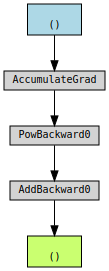

In [ ]:
make_dot(f)

- When finishing gradient computations, the `.backward()` function can be called.
    - This function accumulates **all gradients** computed automatically into `.grad` attribute.
    - It is the **partial derivate** of the function w.r.t. the tensor.

In [ ]:
x = torch.tensor([2.3, 2.1, 2.4], requires_grad = True)
x

tensor([2.3000, 2.1000, 2.4000], requires_grad=True)

In [ ]:
def f(x):
  return x**2 + x

In [ ]:
y = f(x).mean()
y

tensor(7.4200, grad_fn=<MeanBackward0>)

In [ ]:
y.grad_fn

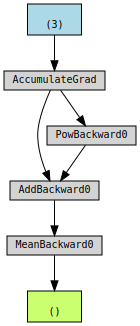

In [ ]:
make_dot(y)

In [ ]:
y.backward()
x.grad

tensor([1.8667, 1.7333, 1.9333])

In [ ]:
x = torch_input=torch.tensor([[ 1.0,  2.0,  3.0],
                              [ 4.0,  5.0,  6.0],
                              [ 7.0,  8.0,  9.0],
                              [10.0, 11.0, 12.0]], requires_grad=True)
x

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]], requires_grad=True)

In [ ]:
def f(x):
  return (x**3) + 3*(x**2) + 2*x + 4

- Note that `grad` can be implicitly created only for **scalar** outputs.

In [ ]:
y = f(x).sum()
y

tensor(8238., grad_fn=<SumBackward0>)

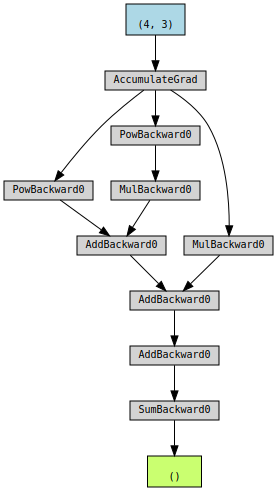

In [ ]:
make_dot(y)

In [ ]:
y.backward()
x.grad

tensor([[ 11.,  26.,  47.],
        [ 74., 107., 146.],
        [191., 242., 299.],
        [362., 431., 506.]])

## **5.2. Detaching Gradient Tracking: `.grad.zero_()`**

- By default, whenever `.backward()` is called, the [**gradients are accumulated into `.grad` attribute**](https://pytorch.org/tutorials/recipes/recipes/zeroing_out_gradients.html#zeroing-out-gradients-in-pytorch) (i.e, **not overwritten**).

- Let us compute the gradients of $f(x)=2x^2+x$

In [ ]:
x = torch.tensor(3.0, requires_grad=True)

for _ in range(5):
  f = 2 * x**2 + x
  f.backward()
  print(x.grad)

tensor(13.)
tensor(26.)
tensor(39.)
tensor(52.)
tensor(65.)


In [ ]:
params = torch.ones(4, requires_grad=True)

for _ in range(5):
    model_output = (params*3).sum()
    model_output.backward()
    print(params.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])


- It is beneficial to **zero out gradients** when building a neural network.
- Now,  `.grad.zero_()` can be used for this purpose.

In [ ]:
x = torch.tensor(3.0, requires_grad=True)

for _ in range(5):
  f = 2 * x**2 + x
  f.backward()
  print(x.grad)
  x.grad.zero_()

tensor(13.)
tensor(13.)
tensor(13.)
tensor(13.)
tensor(13.)


In [ ]:
params = torch.ones(4, requires_grad=True)

for _ in range(5):
    model_output = (params*3).sum()
    model_output.backward()
    print(params.grad)
    params.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


- The gradients above are correct.

# **6. Gradient Descent**


- Gradient descent is an **iterative optimization algorithm** commonly used in machine learning and neural networks.
- Adjusting the **parameters** in the direction of the steepest descent of the **objective** (**loss** or **error** in ML and DL) function.


- Given $\mathbf{X}_{n\times j}=(-\mathbf{x}_1-,-\mathbf{x}_2-,\cdots,-\mathbf{x}_n-)'$, $\mathbf{y}_{n\times 1}=(y_1,y_2,\cdots,y_n)'$.
- For $\mathbf{w}=(w_1,w_2,\cdots,w_j)'$:
$$\hat{y}\leftarrow\mathbf{X}\mathbf{w}$$





- Steps of GD Optimization Algorithm:

  * **0. Initialization**: $$w_j\sim \cal{N}(0,1), \forall j$$

  * **1. Forward Pass (Prediction)**: $$\hat{y}\leftarrow\mathbf{X}\mathbf{w}$$

  * **2. Loss (Cost) Calculation**: $$\ell_1=\ell(\mathbf{w})=\frac{1}{n}\sum|\hat{y}-y|\text{ or } \ell_2=\ell(\mathbf{w})=\frac{1}{n}\sum(\hat{y}-y)^2 $$

  * **3. Backward Pass (Gradient Computation)**: $$\nabla \mathbf{w}\leftarrow\frac{\partial \ell(\mathbf{w})}{\partial \mathbf{w}}$$

  * **4. Update Parameters**: in the opposite direction of the gradients to minimize the loss (called **gradient descent** optimizer).
  $$\mathbf{w}\leftarrow \mathbf{w} - \alpha \times \nabla \mathbf{w}$$
    - $\alpha$ is learning rate hyperparameter (common values are 0.01, 0.001, 0.0001):
      - Larger **learning rate** ($\alpha$) means the optimizer will try larger updates (if too large and the optimizer will fail to work).
      - Lower $\alpha$ value means the optimizer will try smaller updates (if too small and the optimizer will take too long).
    - GD is often implemented with additional techniques like momentum, adaptive learning rates, and regularization.
      - **SGD with Momentum**: Includes a term to accelerate gradients vectors in the right directions.
      - **AdaGrad**: Adapts the learning rate based on the frequency of updates.
      - **RMSprop**: Adapts the learning rate based on a moving average of squared gradients.
      - **Adam** (Adaptive Moment Estimation): Combines the ideas of momentum and RMSprop.

- **Notes**:
    - The steps 1-4 are repeated for a **specified number of iterations (called epochs)** or until the loss is minimized to a satisfactory level.
    - Step 4 (Update Parameters) should not be part of the computational graph.


## **6.1. Single Point Approximation**
- Let's start small begining with a point, given $x=1$ and $y=2$.

- Linear regression: $y = w * x $. Here consider : $ 2 = w * 1 $.

- Let find the optimal value of $w$ such that it can approximate $y=2$ for $x=1$.



#### **Using Numpy**

**Initialization**: $x=1,y=2$, $lr=0.1$; initial $w=1$

In [ ]:
x = np.array(1.0)
y = np.array(2.0)
w = np.array(1.0)
lr = 0.1

**1. Forward pass**: $\hat{y} \leftarrow \mathbf{x}'\mathbf{w}$

In [ ]:
y_hat= w * x
y_hat

1.0

**2. Calculate loss**: $loss\leftarrow\ell(\mathbf{w})=(\hat{y}-y)^2 $

In [ ]:
loss = (y_hat - y)**2
loss

1.0

**3. Backward pass**: $\Delta \mathbf{w}\leftarrow \frac{\partial loss}{\partial \mathbf{w}}$

In [ ]:
dw = 2*(y_hat - y)
dw

-2.0

**4. Update parameters**: $\mathbf{w}\leftarrow \mathbf{w} - \alpha \times \Delta \mathbf{w}$

In [ ]:
w = w - lr * dw
w

1.2

- All steps in one in a for loop

In [ ]:
x = np.array(1.0)
y = np.array(2.0)
w = 1
lr = 0.1

for step in range(10):
  y_hat= w * x
  loss = (y_hat - y)**2
  dw = 2*(y_hat - y)
  w = w - lr * dw

  print(f"Step: {step + 1}, predicted = {y_hat:.2f}, Loss = {loss:.3f}, w = {w:.4f}, dw = {dw:.5f}")

print(f"Final w = {w:.3f}")

Step: 1, predicted = 1.00, Loss = 1.000, w = 1.2000, dw = -2.00000
Step: 2, predicted = 1.20, Loss = 0.640, w = 1.3600, dw = -1.60000
Step: 3, predicted = 1.36, Loss = 0.410, w = 1.4880, dw = -1.28000
Step: 4, predicted = 1.49, Loss = 0.262, w = 1.5904, dw = -1.02400
Step: 5, predicted = 1.59, Loss = 0.168, w = 1.6723, dw = -0.81920
Step: 6, predicted = 1.67, Loss = 0.107, w = 1.7379, dw = -0.65536
Step: 7, predicted = 1.74, Loss = 0.069, w = 1.7903, dw = -0.52429
Step: 8, predicted = 1.79, Loss = 0.044, w = 1.8322, dw = -0.41943
Step: 9, predicted = 1.83, Loss = 0.028, w = 1.8658, dw = -0.33554
Step: 10, predicted = 1.87, Loss = 0.018, w = 1.8926, dw = -0.26844
Final w = 1.893


- Set the number of steps to 100, and look at the value of the updated parameter, $w$.

#### **Using PyTorch**

- In the codes below the **numpy arrays are changed to torch tensors**.

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)
lr = 0.1

for step in range(10):
  y_hat= w * x
  loss = (y_hat - y)**2
  dw = 2*(y_hat - y)
  w = w - lr * dw

  print(f"Step: {step + 1}, predicted = {y_hat:.2f}, Loss = {loss:.3f}, w = {w:.4f}, dw = {dw:.5f}")

print(f"Final w = {w:.3f}")

<ipython-input-128-aa55f2deb640>:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  w.grad.zero_()


AttributeError: 'NoneType' object has no attribute 'zero_'

- Set the number of steps to 100, and look at the value of the updated parameter, $w$.

- To use inplace update of the parameter(s), it should be wrapped in `with torch.no_grad():` as




            ```
            with torch.no_grad():
                w -= lr * dw
            ```



## **6.2. Extending to Straight Line**

- Now let us look at a straight line:  $y=wx \Rightarrow y\approx w*x $.

In [ ]:
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)
n = len(x)

### **Using Numpy**

In [ ]:
lr = 0.01
epochs = 20

w = 0.0
for step in range(10):
  y_pred = w * x
  loss = np.sum((y_pred - y)**2) / n
  dw = np.sum(2 * x * (y_pred - y)) / n
  w = w - lr * dw
  print(f'Epoch {step + 1}: w = {w:.3f}, loss = {loss:.5f}')

Epoch 1: w = 0.300, loss = 30.00000
Epoch 2: w = 0.555, loss = 21.67500
Epoch 3: w = 0.772, loss = 15.66019
Epoch 4: w = 0.956, loss = 11.31449
Epoch 5: w = 1.113, loss = 8.17472
Epoch 6: w = 1.246, loss = 5.90623
Epoch 7: w = 1.359, loss = 4.26725
Epoch 8: w = 1.455, loss = 3.08309
Epoch 9: w = 1.537, loss = 2.22753
Epoch 10: w = 1.606, loss = 1.60939


### **Using PyTorch**

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
n = len(x)

lr = 0.01
epochs = 20

w = torch.tensor(0.0, requires_grad=True)

for step in range(10):
  y_pred = w * x
  loss = torch.sum((y_pred - y)**2) / n
  dw = torch.sum(2 * x * (y_pred - y)) / n
  w = w - lr * dw
  print(f'Epoch {step + 1}: w = {w:.3f}, loss = {loss:.5f}')

Epoch 1: w = 0.29999998211860657, loss = 30.00000
Epoch 2: w = 0.5549999475479126, loss = 21.67500
Epoch 3: w = 0.7717499136924744, loss = 15.66019
Epoch 4: w = 0.9559874534606934, loss = 11.31449
Epoch 5: w = 1.1125893592834473, loss = 8.17472
Epoch 6: w = 1.2457009553909302, loss = 5.90623
Epoch 7: w = 1.358845829963684, loss = 4.26725
Epoch 8: w = 1.4550189971923828, loss = 3.08309
Epoch 9: w = 1.5367661714553833, loss = 2.22753
Epoch 10: w = 1.6062512397766113, loss = 1.60939


## **6.3. Using Built-in Functions for Loss and Gradient**

- Let us functionalize the functions.

  - 1. Forward pass - Manually
  - 2. Loss calculation - Built-in: `nn.MSELoss()`
  - 3. Gradient computation  - Built-in: `.backward()`
  - 4. Update parameters - Manually
  - 5. Zero gradients - Manually


 - The weight update (`w = w - lr * dw`) should **not be part of the computational graph**.

    - In-place operation for the update should be wrapped in `with torch.no_grad():` as:

    ```
      with torch.no_grad():
          w -= lr * dw
    ```

 - One more thing, **must empty or zero the gradients** prior to calling the `.backward` function.
 - The `.zero_()` method is used to zero out the elements of a tensor, i.e., `w.grad.zero_()`.
    - In the code below, comment out it and observe the difference in the results.

In [ ]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
n = len(x)

lr = 0.01
epochs = 20

w = torch.tensor(0.0, requires_grad=True)
criterion = nn.MSELoss()

for step in range(10):
  y_pred = w * x
  loss = criterion(y_pred, y)
  loss.backward()
  with torch.no_grad():
    w -= lr * w.grad
  w.grad.zero_()

  print(f'Epoch {step + 1}: w = {w:.3f}, loss = {loss:.5f}')

Epoch 1: w = 0.300, loss = 30.00000
Epoch 2: w = 0.555, loss = 21.67500
Epoch 3: w = 0.772, loss = 15.66019
Epoch 4: w = 0.956, loss = 11.31449
Epoch 5: w = 1.113, loss = 8.17472
Epoch 6: w = 1.246, loss = 5.90623
Epoch 7: w = 1.359, loss = 4.26725
Epoch 8: w = 1.455, loss = 3.08309
Epoch 9: w = 1.537, loss = 2.22753
Epoch 10: w = 1.606, loss = 1.60939


- **Difference between `axis` and `dim`**?

    - `axis` works for both numpy and tensor arrays.
    - `dim` works for tensor arrays only.

In [ ]:
x = np.array([2.0, 1.0, 0.1])
print(x.sum())
print(x.sum(axis=0))
# print(x.sum(dim=0)) # dim is not working

3.1
3.1


In [ ]:
y = torch.tensor([2.0, 1.0, 0.1])
print(y.sum())
print(y.sum(dim=0))
print(y.sum(axis=0)) # axis is also working

tensor(3.1000)
tensor(3.1000)
tensor(3.1000)


**Utility Functions**

In [ ]:
def accuracy_metric(y_true, y_pred):
  correct_preds = torch.eq(y_true, y_pred).sum().item()
  return (correct_preds / len(y_pred)) * 100

**Experiment Timing Function**

In [ ]:
from timeit import default_timer as timer
def computing_time( start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Computing time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
start_time = timer()
# some code here
end_time = timer()
computing_time(start = start_time, end = end_time, device = "cpu")

# **Other**




## **Subclassing `nn.Module`**
- [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) acts as a box that brings together multiple functions for model implementation, analysis and other uses.


In [ ]:
import torch
from torch import nn

class Add(nn.Module):
    def __init__(self):
        super(Add, self).__init__()

    def forward(self, x1, x2):
        return torch.add(x1, x2)


x1 = torch.tensor([1])
x2 = torch.tensor([2])

add = Add()
output = add(x1, x2)

output == 3

tensor([True])

## **Containers: [`nn.Sequential()`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential)**


- To combine modules into one and run them sequentially.

In [ ]:
import torch
from torch import nn

class Add(nn.Module):
    def __init__(self, value):
        super().__init__()
        self.value = value

    def forward(self, x):
        return x + self.value


#        y = x + 3 + 2 + 5
calculator = nn.Sequential(
    Add(3),
    Add(2),
    Add(5))


x = torch.tensor([1])

output = calculator(x)

output.item() == 11

True

## **Module List: [`nn.ModuleList()`](https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html#torch.nn.ModuleList)**

- It looks good to bring together functions that have a fixed order of execution!

In [ ]:
import torch
from torch import nn

class Add(nn.Module):
    def __init__(self, value):
        super().__init__()
        self.value = value

    def forward(self, x):
        return x + self.value

class Calculator(nn.Module):
    def __init__(self):
        super().__init__()
        self.add_list = nn.ModuleList([Add(2), Add(3), Add(5)])

    def forward(self, x):
        for i, _ in enumerate(self.add_list):
            x = self.add_list[i](x)
        return x

x = torch.tensor([1])

calculator = Calculator()
output = calculator(x)

output == 11

tensor([True])

## **Module Dictionary: [`nn.ModuleDict()`](https://pytorch.org/docs/stable/generated/torch.nn.ModuleDict.html#torch.nn.ModuleDict)**


- In `torch.nn.ModuleList()`, if the size of the modules on the list gets really big, it will be really hard to find the module we want with indexing in the future!
- If we store a particular module using the key value like Python's dict,
Wouldn't it be easier to bring the module we want later?

In [ ]:
import torch
from torch import nn

class Add(nn.Module):
    def __init__(self, value):
        super().__init__()
        self.value = value

    def forward(self, x):
        return x + self.value

class Calculator(nn.Module):
    def __init__(self):
        super().__init__()
        self.add_dict = nn.ModuleDict({'add2': Add(2),
                                       'add3': Add(3),
                                       'add5': Add(5)})

    def forward(self, x):
        for key in self.add_dict.keys():
          x = self.add_dict[key](x)
        return x

x = torch.tensor([1])

calculator = Calculator()
output = calculator(x)

output == 11

tensor([True])

## **Python List vs PyTorch ModuleList**

In [ ]:
class Add(nn.Module):
    def __init__(self, value):
        super().__init__()
        self.value = value

    def forward(self, x):
        return x + self.value


class PythonList(nn.Module):
    """Python List"""
    def __init__(self):
        super().__init__()

        # Python List
        self.add_list = [Add(2), Add(3), Add(5)]

    def forward(self, x):
        x = self.add_list[1](x)
        x = self.add_list[0](x)
        x = self.add_list[2](x)

        return x

class PyTorchList(nn.Module):
    """PyTorch List"""
    def __init__(self):
        super().__init__()

        # Pytorch ModuleList
        self.add_list = nn.ModuleList([Add(2), Add(3), Add(5)])

    def forward(self, x):
        x = self.add_list[1](x)
        x = self.add_list[0](x)
        x = self.add_list[2](x)

        return x

In [ ]:
x = torch.tensor([1])

python_list = PythonList()
pytorch_list = PyTorchList()

print(python_list(x), pytorch_list(x))

tensor([11]) tensor([11])


In [ ]:
python_list

PythonList()

In [ ]:
pytorch_list

PyTorchList(
  (add_list): ModuleList(
    (0-2): 3 x Add()
  )
)

- It is right because PyTorch module list holds other submodules in a list.
- PyTorch modules are properly registered, and are visible by all module methods.
- The indexing is also similar to like that of a regular Python list.


## **Module Parameter: [`nn.parameter.Parameter()`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html?highlight=parameter)**


In [ ]:
import torch
from torch import nn
from torch.nn.parameter import Parameter


class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()

        self.W = Parameter(torch.ones((out_features, in_features)))
        self.b = Parameter(torch.ones((out_features)))

    def forward(self, x):
        output = torch.addmm(self.b, x, self.W.T)

        return output


x = torch.Tensor([[1, 2],
                  [3, 4]])

linear = Linear(2, 3)
Y = linear(x)
Y

tensor([[4., 4., 4.],
        [8., 8., 8.]], grad_fn=<AddmmBackward0>)

**Tensor vs Parameter**


- Should not W and B also use a tensor? Why do we have to use a separate class called `.Parameter`?

In [ ]:
import torch
from torch import nn
from torch.nn.parameter import Parameter


class LinearParameter(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()

        self.W = Parameter(torch.ones((out_features, in_features)))
        self.b = Parameter(torch.ones(out_features))

    def forward(self, x):
        output = torch.addmm(self.b, x, self.W.T)

        return output

class LinearTensor(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()

        self.W = torch.ones((out_features, in_features))
        self.b = torch.ones(out_features)

    def forward(self, x):
        output = torch.addmm(self.b, x, self.W.T)

        return output


x = torch.Tensor([[1, 2],
                  [3, 4]])

linear_parameter = LinearParameter(2, 3)
linear_tensor = LinearTensor(2, 3)

Y_parameter = linear_parameter(x)
Y_tensor = linear_tensor(x)

print(Y_parameter)
print(Y_tensor)

tensor([[4., 4., 4.],
        [8., 8., 8.]], grad_fn=<AddmmBackward0>)
tensor([[4., 4., 4.],
        [8., 8., 8.]])


- The values are calculated the same!
- But we use the parameter to make `W`, `b` only.

In [ ]:
linear_parameter.state_dict()

OrderedDict([('W',
              tensor([[1., 1.],
                      [1., 1.],
                      [1., 1.]])),
             ('b', tensor([1., 1., 1.]))])

In [ ]:
linear_tensor.state_dict()

OrderedDict()

- Parameter objects are tensor objects that can be optimized.
- Unlike a parameter, a tensor does not calculate gradients.
  - Hence, the value of a tensor is not updated.
  - The value of a tensor cannot also be saved unlike a parameter when saving a model.

- "Tensor"
    - ❌ Gradient calculation
    - ❌ Update the value
    - ❌ Save value when saving model
- "Parameter"
    - ✅ Gradient calculation
    - ✅ Update the value
    - ✅ Save value when saving model